<a href="https://colab.research.google.com/github/kunalprakash1309/Introduction-to-Statistical-Learning-using-Python/blob/main/Chapter_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.api as sm

In [ ]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 63.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 13.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 47.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=5153fa3a5d4dd092b13868f8d62a3b78eef4c5120c4e2b6eed52e3eddad7c

In [ ]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [ ]:
dir() # => this function provides a list of objects in a namespace

['In',
 'MS',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'pd',
 'plt',
 'poly',
 'quit',
 'sm',
 'summarize']

In [ ]:
A = np.array([3,5,9])
dir(A) # => this will include both the attributes of the object as well as any methods associated with A

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [ ]:
A.sum()

17

## Simple Linear Regression

In [ ]:
Boston = load_data("Boston")
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [ ]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [ ]:
Boston?

### We will fit a simple linear regression model using OLS(ordinary least squares).
Our response will be `medv` and `lstat` will be the single predictor.

In [ ]:
# We will create the model matrix by hand.
# y = a + b.(lstat)  => y is response, a and b are coeffecients and lstat is predictor. Here X = LHS

X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Above intercept is equals to 1 for all observation and lstat is equal to respective observation from Boston Data.

i.e. a is intercept that is why we keep value of 1 with every observation and coeffecient of lstat is b

In [ ]:
# we extract the response, and fit the model
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [ ]:
design = MS(['lstat'])       # Here we are specifying the predictor variable for our model
design = design.fit(Boston)  # fit => searches for lstat column from Boston dataset
X = design.transform(Boston) # transform => constructs the model matrix with two columns: and intercept and variable lstat
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


Another method

In [ ]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           5.08e-88
Time:                        18:13:37   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

Now we will predict the medv. Here we will provide `a` and `lstat` as 1 and 5. Here we take a = 1 because we find the intercept value which get multiplied by 1.

In [ ]:
prediction = results.get_prediction([1, 5])
prediction?

Now we will predict for multiple value simultaneously.

In [ ]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
newX = design.fit_transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [ ]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

Produce confidence intervals for the predicted values.

In [ ]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

Now, produce prediction intervals by setting `obs=True`

In [ ]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

## Graph and Plotting

In [ ]:
def abline(ax, b, m, *args, **kargs):
  "Add a line with slope m and intercept b to ax"
  xlim = ax.get_xlim() # => return the x-axis limits
  ylim = [m * xlim[0] + b, m * xlim[1] + b]  # => xlim[0] = left end point, xlim[0] = right end point
  ax.plot(xlim, ylim, *args, **kargs)

<Axes: xlabel='lstat', ylabel='medv'>

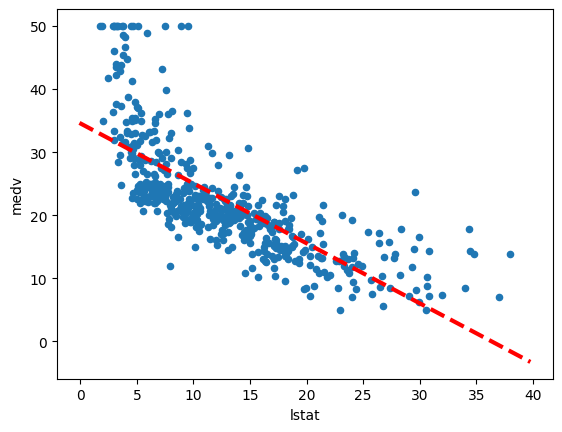

In [ ]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)
ax

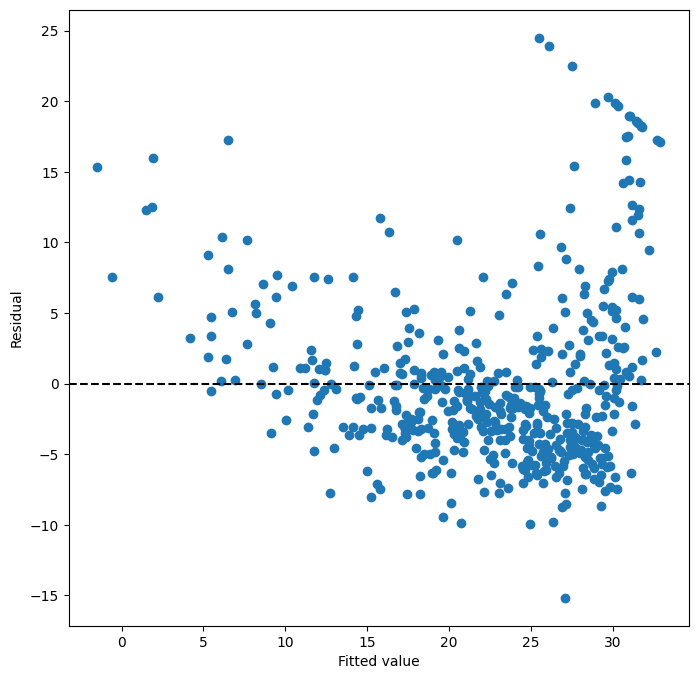

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(results.fittedvalues, results.resid) # => fittedvalues = predicted value of original lstat, resid = resid of respective observation
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

374

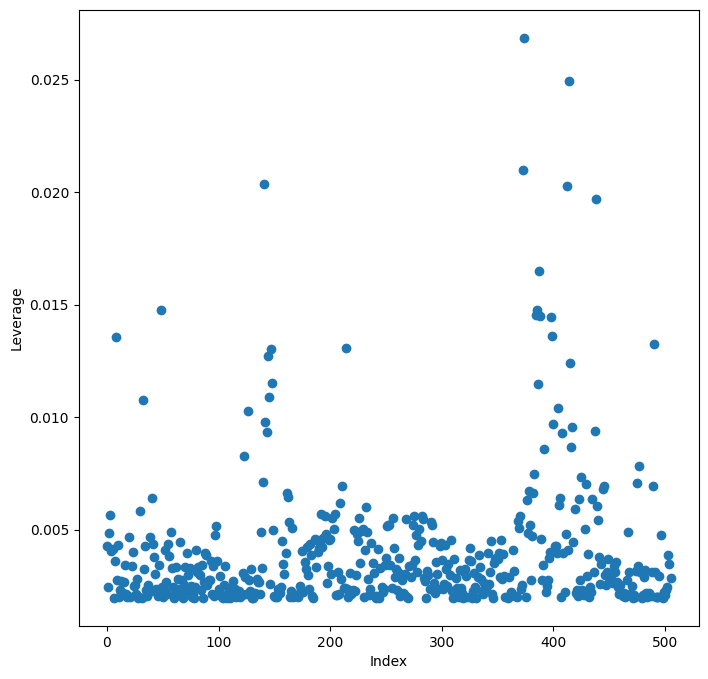

In [ ]:
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag) # np.arange(506) = create an array from 0 to 505, ingl.hat_matrix_diag = get the matrix element for respective observation from 0 to 505
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag) # => return the index of max value along x axis

## Multiple Linear Regression

In [ ]:
X = MS(['lstat', 'age']).fit_transform(Boston)
X[:4]

,intercept,lstat,age
0,1.0,4.98,65.2
1,1.0,9.14,78.9
2,1.0,4.03,61.1
3,1.0,2.94,45.8


In [ ]:
y = Boston['medv']
model = sm.OLS(y, X)
results1 = model.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


Now include all predictor into our least square model

In [ ]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [ ]:
X = MS(terms).fit_transform(Boston)
y = Boston['medv']
model = sm.OLS(y,X)
results2 = model.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


Above we should neglect `age` and `indus` variable as they have high p-value

In [ ]:
X_ai = MS(Boston.columns.drop(['medv', 'age', 'indus'])).fit_transform(Boston)
model = sm.OLS(y, X_ai)
results3 = model.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,41.4517,4.903,8.454,0.000
crim,-0.1217,0.033,-3.696,0.000
zn,0.0462,0.014,3.378,0.001
chas,2.8719,0.863,3.329,0.001
nox,-18.2624,3.565,-5.122,0.000
rm,3.6730,0.409,8.978,0.000
dis,-1.5160,0.188,-8.078,0.000
rad,0.2839,0.064,4.440,0.000
tax,-0.0123,0.003,-3.608,0.000
ptratio,-0.9310,0.130,-7.138,0.000


In [ ]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.73e-135
Time:                        21:50:32   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.4517      4.903      8.454      0.000      31.818      51.086
crim          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
zn             0.0462      0.014      3.378      0.001       0.019       0.073
chas           2.8719      0.863      3.329      0.001       1.177       4.567
nox          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
rm             3.6730      0.409      8.978      0.000       2.869       4.477
dis           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
rad            0.2839      0.064      4.440      0.000       0.158       0.410
tax           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
ptratio       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
lstat         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
results3.rsquared # => R^2

0.7342422518382485

In [ ]:
np.sqrt(results3.scale) # => RSE

4.7889153322237465

## Multivariate Goodness of Fit

we know that collinearity effect the model. Hence we will investigate collinearity using VIF method

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [ ]:
vals = [VIF(X, i) for i in range(1, X.shape[1])] #=> careful! here We are using X which is a model matrix. Here we are excluding 0 because it is intercept.
vif = pd.DataFrame({'vif': vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In above table VIFs are not intresting

## Interaction Terms

Including `(age, lstat)` tell the model matrix builder to include to interaction term

In [ ]:
X_it = MS(['lstat','age', ('lstat', 'age')]).fit_transform(Boston)
y = Boston['medv']
model_it = sm.OLS(y, X_it)
result_it = model_it.fit()
summarize(result_it)

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [ ]:
result_it.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           4.86e-88
Time:                        22:23:38   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
vals_it = [VIF(X_it, i) for i in range(1, X_it.shape[1])] #=> careful! here We are using X which is a model matrix. Here we are excluding 0 because it is intercept.
vif_it = pd.DataFrame({'vif': vals_it}, index=X_it.columns[1:])
vif_it

,vif
lstat,19.101862
age,4.182822
lstat:age,29.300393


## Non-Linear Transformation of predictors

First we are assuming non-linear transformation for `lstat` only

In [ ]:
X_ls = MS([poly('lstat', degree=2)]).fit_transform(Boston)
X_ls

,intercept,"poly(lstat, degree=2)[0]","poly(lstat, degree=2)[1]"
0,1.0,-0.047815,0.038955
1,1.0,-0.021892,-0.010782
2,1.0,-0.053734,0.053604
3,1.0,-0.060527,0.071920
4,1.0,-0.045634,0.033866
...,...,...,...
501,1.0,-0.018589,-0.015433
502,1.0,-0.022265,-0.010231
503,1.0,-0.043702,0.029497
504,1.0,-0.038467,0.018316


In [ ]:
y = Boston['medv']
model_ls = sm.OLS(y, X_ls)
result_ls = model_ls.fit()
summarize(result_ls)

,coef,std err,t,P>|t|
intercept,22.5328,0.246,91.761,0.0
"poly(lstat, degree=2)[0]",-152.4595,5.524,-27.601,0.0
"poly(lstat, degree=2)[1]",64.2272,5.524,11.628,0.0


400

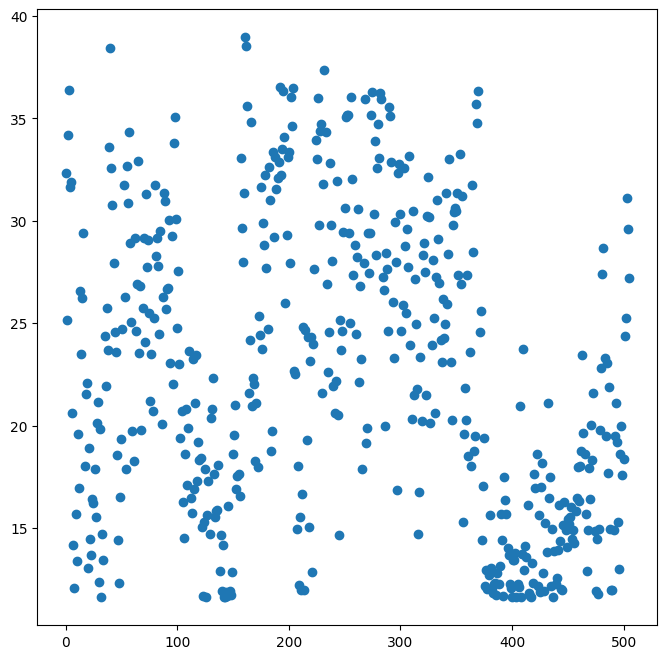

In [ ]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(506),result_ls.fittedvalues)
np.argmin(result_ls.fittedvalues)

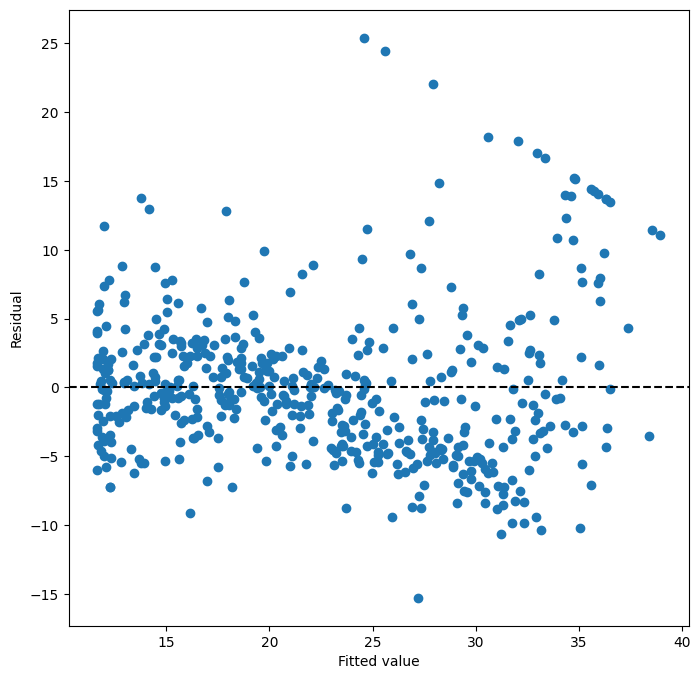

In [ ]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(result_ls.fittedvalues, result_ls.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls="--")

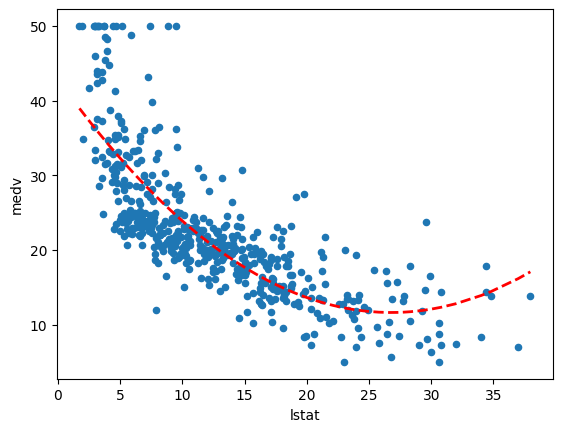

In [ ]:
ax = Boston.plot.scatter('lstat', 'medv')
c, a, b = result_ls.params
x = Boston['lstat']
y = []
for i in range(X_ls.shape[0]):
  c1, a1, b1 = X_ls.loc[i]
  y.append(a*a1 + b*b1 + c*c1)
df = pd.DataFrame({'lstat': x, 'predicted_value': y})
df.sort_values(by=['lstat'], inplace=True)
ax.plot(df['lstat'], df['predicted_value'],'r--', linewidth=2);

In [ ]:
result_ls.rsquared

0.6407168971636611

Now, we will combine `age` with non-linear transformation of `lstat`

In [ ]:
X_nl = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
X_nl

,intercept,"poly(lstat, degree=2)[0]","poly(lstat, degree=2)[1]",age
0,1.0,-0.047815,0.038955,65.2
1,1.0,-0.021892,-0.010782,78.9
2,1.0,-0.053734,0.053604,61.1
3,1.0,-0.060527,0.071920,45.8
4,1.0,-0.045634,0.033866,54.2
...,...,...,...,...
501,1.0,-0.018589,-0.015433,69.1
502,1.0,-0.022265,-0.010231,76.7
503,1.0,-0.043702,0.029497,91.0
504,1.0,-0.038467,0.018316,89.3


In [ ]:
y = Boston['medv']
model_nl = sm.OLS(y, X_nl)
result_nl = model_nl.fit()
summarize(result_nl)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


214

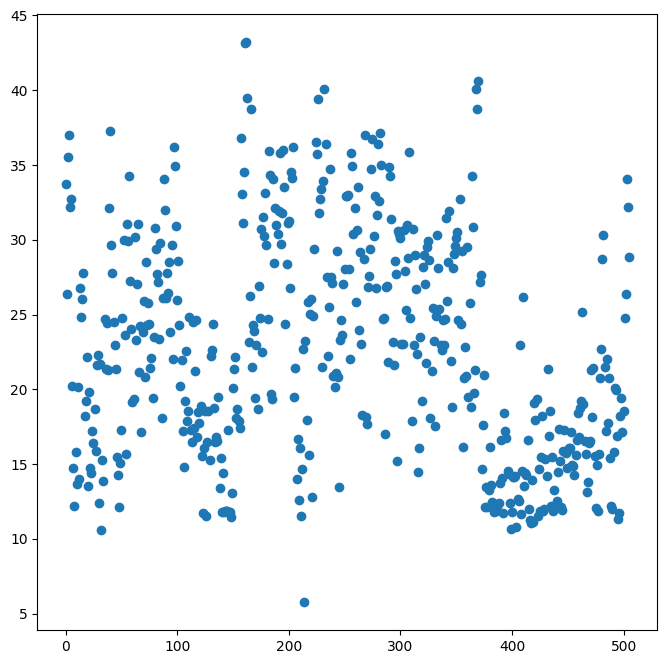

In [ ]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(506),result_nl.fittedvalues)
np.argmin(result_nl.fittedvalues)

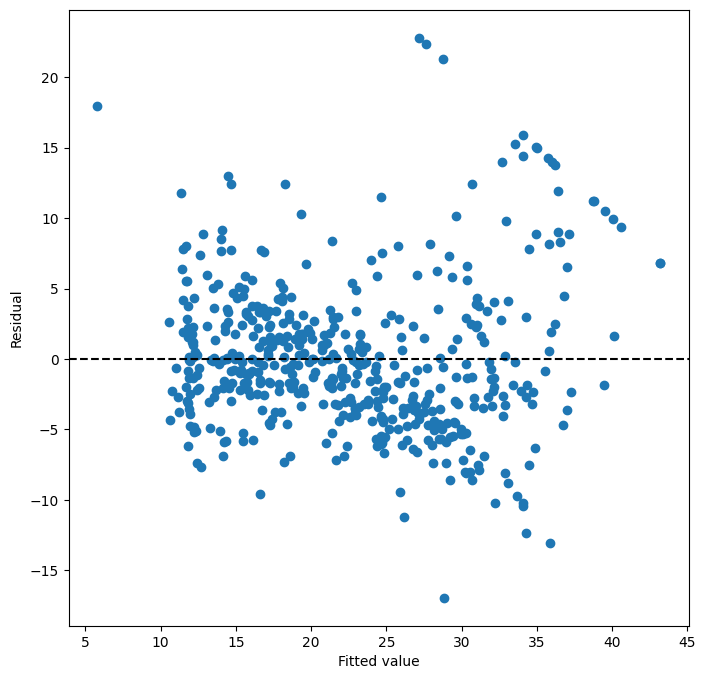

In [ ]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(result_nl.fittedvalues, result_nl.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls="--")

In [ ]:
result_nl.rsquared

0.6683791720749932

Now there is little discernible pattern in the residuals.

## Qualitative Response

In [ ]:
Carseats = load_data('Carseats')
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

The Carseats
data includes qualitative predictors such as ShelveLoc, an indicator of the quality of the shelving location — that is, the space within a store in which the car seat is displayed. The predictor ShelveLoc takes on three possible values, Bad, Medium, and Good. Given a qualitative variable such as ShelveLoc, ModelSpec() generates dummy variables automatically. These variables are often referred to as a one-hot encoding of the categorical feature. Their columns sum to one, so to avoid collinearity with an intercept, the first column is dropped. Below we see the column ShelveLoc[Bad] has been dropped, since Bad is the first level of ShelveLoc. Below we fit a multiple regression model that includes some interaction terms.

In [ ]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


In the first line above, we made allvars a list, so that we could add the interaction terms two lines down. Our model-matrix builder has created a ShelveLoc[Good] dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a ShelveLoc[Medium] dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a zero for each of the two dummy variables. The fact that the coefficient for ShelveLoc[Good] in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And ShelveLoc[Medium] has a smaller positive coefficient, indicating that a medium shelving location leads to higher sales than a bad shelving location, but lower sales than a good shelving location.
